### Problem 2:  Understanding Performance Tunning for Training High Accuracy Deep Models

In [89]:
import tensorflow as tf
import time
import numpy as np
from PIL import Image

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [71]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


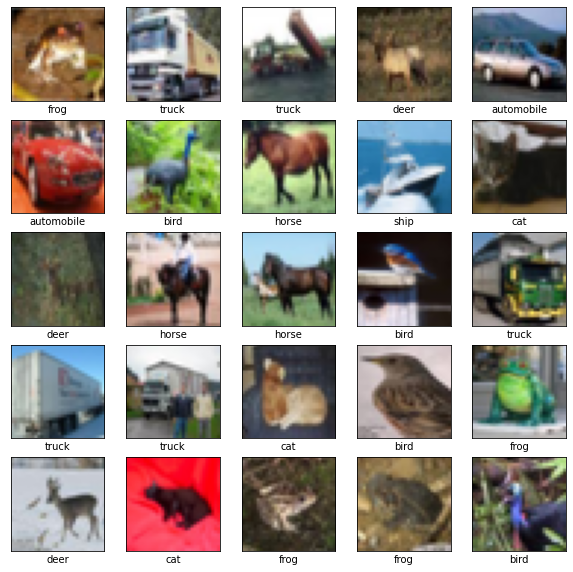

In [72]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Utility functions for modular coding

In [73]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    return model

In [74]:
def train_model(model, model_name, train_data, train_label, test_data, test_label, lrate=0.01, moment=0.0):
    opt = tf.keras.optimizers.SGD(
    learning_rate=lrate, momentum=moment, nesterov=False, name='SGD')
    model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    t0 = time.time()
    history = model.fit(train_data, train_label, epochs=20, validation_data=(test_data, test_label))
    t1 = time.time()
    print("Total training time to train ", model_name, t1-t0)
    return history, model

In [75]:
def evaluate_model(fig_name, model, history, test_data, test_model):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1])
    plt.legend(loc='lower right')
    plt.savefig(fig_name+'.png')

    test_loss, test_acc = model.evaluate(test_data, test_model, verbose=2)
    print('Validation accuracy ', test_acc)

### (1) Compile, train and calculate accuracy of model with default hyper parameters

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1558/1563 [============================>.] - ETA: 0s - loss: 2.0475 - accuracy: 0.2529WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x17ee553a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

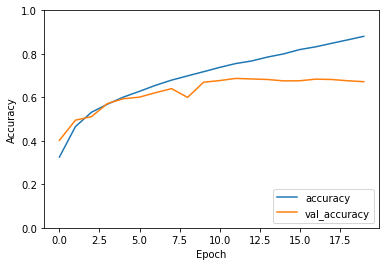

In [76]:
model1 = create_model()
history1, model1 = train_model(model1, 'default', train_images, train_labels, test_images, test_labels)
evaluate_model('default', model1, history1, test_images, test_labels)

In [214]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
flatten_11 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                692288    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 712,330
Trainable params: 712,330
Non-trainable params: 0
_______________________________________________

### (2) Compile, train and calculate accuracy of model for lr = 0.001 and momentum = 0.1

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1561/1563 [============================>.] - ETA: 0s - loss: 2.2769 - accuracy: 0.1420WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x17fa6b1f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

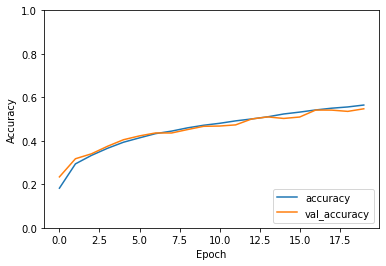

In [77]:
model2 = create_model()
history2, model2 = train_model(model2, 'lr=0.001,m=0.1', train_images, train_labels, test_images, test_labels, 0.001, 0.1)
evaluate_model('lr=0.001,m=0.1', model2, history2, test_images, test_labels)

### (3) Compile, train and calculate accuracy of model for lr = 0.1 and momentum = 0.9

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1557/1563 [============================>.] - ETA: 0s - loss: 2.1916 - accuracy: 0.1752WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2987f5940> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

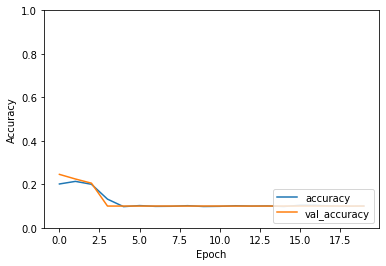

In [78]:
model3 = create_model()
history3, model3 = train_model(model3, 'lr=0.1,m=0.9', train_images, train_labels, test_images, test_labels, 0.1, 0.9)
evaluate_model('lr=0.1,m=0.9', model3, history3, test_images, test_labels)

### (4) Compile, train and calculate accuracy of model for lr = 0.1 and momentum = 0.1

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1557/1563 [============================>.] - ETA: 0s - loss: 1.9562 - accuracy: 0.2852WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x298107ca0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

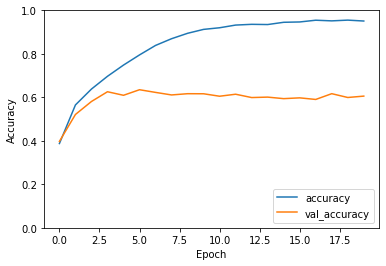

In [79]:
model4 = create_model()
history4, model4 = train_model(model4, 'lr=0.1,m=0.1', train_images, train_labels, test_images, test_labels, 0.1, 0.1)
evaluate_model('lr=0.1,m=0.1', model4, history4, test_images, test_labels)

### (5) Compile, train and calculate accuracy of model for lr = 0.001 and momentum = 0.9

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1559/1563 [============================>.] - ETA: 0s - loss: 2.0807 - accuracy: 0.2382WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x17eb9e4c0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

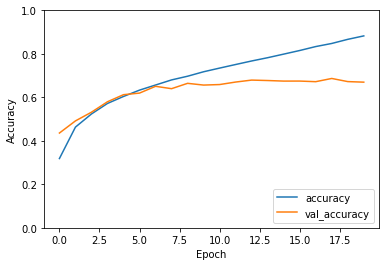

In [80]:
model5 = create_model()
history5, model5 = train_model(model5, 'lr=0.001,m=0.9', train_images, train_labels, test_images, test_labels, 0.001, 0.9)
evaluate_model('lr=0.001,m=0.9', model5, history5, test_images, test_labels)

### Confusion matrix analysis

In [86]:
def computeConfusion(model, model_name):
    predictions = model.predict(test_images)
    predictions = np.argmax(predictions,axis = 1)
    
    confusion_matrix = tf.math.confusion_matrix(
        test_labels, predictions, num_classes=None, weights=None, dtype=tf.dtypes.int32,name=None)
    print("The confusion matrix is for ", model_name, confusion_matrix)

In [87]:
#Confusion matrix for model1
computeConfusion(model1, "model1")
computeConfusion(model2, "model2")
computeConfusion(model3, "model3")
computeConfusion(model4, "model4")

The confusion matrix is for  model1 tf.Tensor(
[[632  17  73  50  19  18  16  33 112  30]
 [ 17 810   9  21   4  14   9  11  42  63]
 [ 51   7 500 121  73 118  50  57  15   8]
 [  6   6  47 577  32 226  39  50  13   4]
 [  8   5  70 111 543 101  58  87  17   0]
 [ 10   6  27 186  21 661  14  66   8   1]
 [  3   6  43 113  35  79 701  12   7   1]
 [  9   2  15  45  34  88   4 796   5   2]
 [ 40  46  10  33   7  20   9   9 816  10]
 [ 28 101  12  53   8  26  12  42  35 683]], shape=(10, 10), dtype=int32)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsuppor

### Predicting images from classes using best model

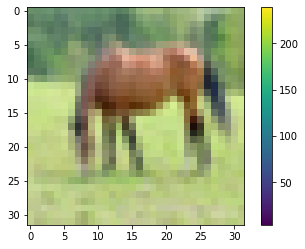

horse


In [155]:
plt.figure()
plt.imshow(Image.fromarray((test_images[60]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = test_images[60]
idx = np.argmax(model5.predict(image[np.newaxis,:]))
print(class_names[idx])

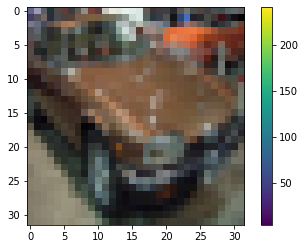

automobile


In [156]:
plt.figure()
plt.imshow(Image.fromarray((test_images[2000]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = test_images[2000]
idx = np.argmax(model5.predict(image[np.newaxis,:]))
print(class_names[idx])

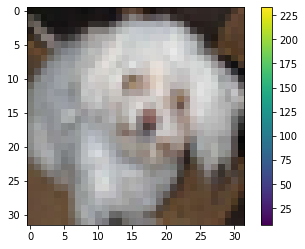

dog


In [157]:
plt.figure()
plt.imshow(Image.fromarray((test_images[1000]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = test_images[1000]
idx = np.argmax(model5.predict(image[np.newaxis,:]))
print(class_names[idx])

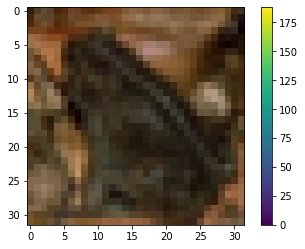

frog


In [158]:
plt.figure()
plt.imshow(Image.fromarray((test_images[30]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = test_images[30]
idx = np.argmax(model5.predict(image[np.newaxis,:]))
print(class_names[idx])

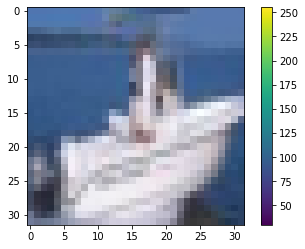

ship


In [159]:
plt.figure()
plt.imshow(Image.fromarray((test_images[9000]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = test_images[9000]
idx = np.argmax(model5.predict(image[np.newaxis,:]))
print(class_names[idx])

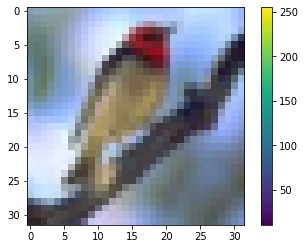

bird


In [164]:
plt.figure()
plt.imshow(Image.fromarray((test_images[3003]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = test_images[3003]
idx = np.argmax(model5.predict(image[np.newaxis,:]))
print(class_names[idx])

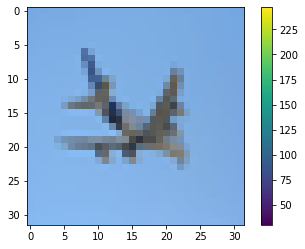

airplane


In [185]:
plt.figure()
plt.imshow(Image.fromarray((test_images[3024]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = test_images[3024]
idx = np.argmax(model5.predict(image[np.newaxis,:]))
print(class_names[idx])

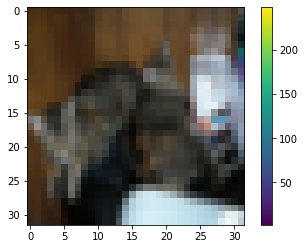

cat


In [172]:
plt.figure()
plt.imshow(Image.fromarray((test_images[3011]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = test_images[3011]
idx = np.argmax(model5.predict(image[np.newaxis,:]))
print(class_names[idx])

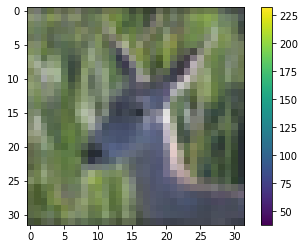

deer


In [177]:
plt.figure()
plt.imshow(Image.fromarray((test_images[3016]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = test_images[3016]
idx = np.argmax(model5.predict(image[np.newaxis,:]))
print(class_names[idx])

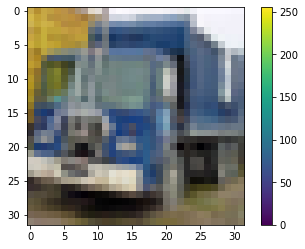

truck


In [186]:
plt.figure()
plt.imshow(Image.fromarray((test_images[14]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = test_images[14]
idx = np.argmax(model5.predict(image[np.newaxis,:]))
print(class_names[idx])

### Model performance on outlier detection

#### Preprocessing data to account for outlier class 

In [141]:
a = train_labels<7
arr_train_l7 = ["False"]*a.size
idx=0
for i in a:
    arr_train_l7[idx] = i[0]
    idx+=1
    
a = test_labels<7
arr_test_l7 = ["False"]*a.size
idx=0
for i in a:
    arr_test_l7[idx] = i[0]
    idx+=1
    
a = train_labels>=7
arr_train_g7 = ["False"]*a.size
idx=0
for i in a:
    arr_train_g7[idx] = i[0]
    idx+=1
    
a = test_labels>=7
arr_test_g7 = ["False"]*a.size
idx=0
for i in a:
    arr_test_g7[idx] = i[0]
    idx+=1

In [142]:
train_images_modified = train_images[arr_train_l7]
train_labels_modified = train_labels[arr_train_l7]

(35000, 32, 32, 3)

In [145]:
test_images_modified = test_images[arr_test_l7]
test_labels_modified = test_labels[arr_test_l7]

(7000, 32, 32, 3)

In [147]:
outlier_images = test_images[arr_test_g7]
outlier_labels = test_labels[arr_test_g7]

(3000, 32, 32, 3)

## Training a new model on 7 classes

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1094/1094 [==============================] - ETA: 0s - loss: 1.8135 - accuracy: 0.2820WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x299053040> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

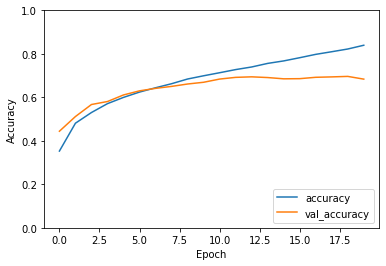

In [149]:
model6 = create_model()
history6, model6 = train_model(model6, 'outlier', train_images_modified, train_labels_modified, test_images_modified, test_labels_modified, 0.001, 0.9)
evaluate_model('outlier', model6, history6, test_images_modified, test_labels_modified)

### Using the remaining 3 classes as outliers to test the model
#### Running each cell 3 times.

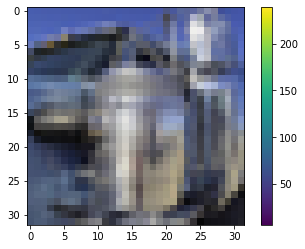

cat


In [197]:
plt.figure()
plt.imshow(Image.fromarray((outlier_images[14]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = outlier_images[14]
idx = np.argmax(model6.predict(image[np.newaxis,:]))
print(class_names[idx])
#Output on 3 runs: cat, cat, cat

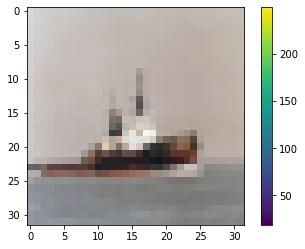

airplane


In [201]:
plt.figure()
plt.imshow(Image.fromarray((outlier_images[24]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = outlier_images[24]
idx = np.argmax(model6.predict(image[np.newaxis,:]))
print(class_names[idx])
#Output on 3 runs: airplane, airplane, airplane

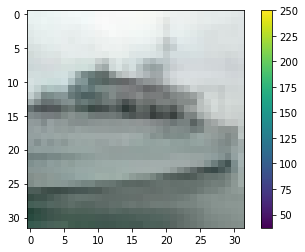

airplane


In [205]:
plt.figure()
plt.imshow(Image.fromarray((outlier_images[28]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = outlier_images[28]
idx = np.argmax(model6.predict(image[np.newaxis,:]))
print(class_names[idx])
#Output of 3 runs: airplane, airplane, airplane

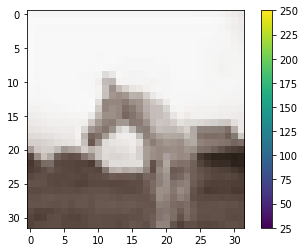

airplane


In [208]:
plt.figure()
plt.imshow(Image.fromarray((outlier_images[30]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = outlier_images[28]
idx = np.argmax(model6.predict(image[np.newaxis,:]))
print(class_names[idx])
#Output of 3 runs: airplane, airplane, airplane

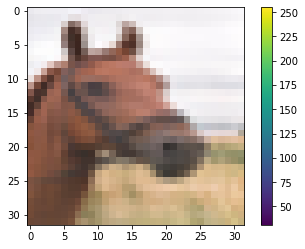

cat


In [213]:
plt.figure()
plt.imshow(Image.fromarray((outlier_images[34]*255).astype(np.uint8)))
plt.colorbar()
plt.grid(False)
plt.show()

image = outlier_images[34]
idx = np.argmax(model6.predict(image[np.newaxis,:]))
print(class_names[idx])
#Output of 3 runs: cat, cat, cat